# GitHub Mining 

## Git, GitHub - was ist das? 

**`Git`** ist eine Software zur Versionsverwaltung bei der Entwicklung von Software. Entwickelt wurde Git aufgrund von Lizenzproblemen mit der ursprünglichen Versionsverwaltungssoftware die bei der Entwicklung des Linux-Kernels zum Einsatz kam. Der Initiator *Linus Torvalds* präsentierteeine erste Version, wenige Monate nach Entwicklungsbeginn, bereits im April 2005. [[5](#Referenzen)]

> “I’m an egotistical bastard, and I name all my projects after myself. First ‘Linux’, now ‘Git’.”
   „Ich bin ein egoistisches Arschloch und ich benenne all meine Projekte nach mir. Zuerst ‚Linux‘, jetzt eben ‚Git‘.“
      – Linus Torvalds [[3](#Referenzen)]
      
`Linux` basiert auf seinem Vornamen `Linus` wobei `Git` ins Deutsche als `Trottel, Blödmann` zu übersetzen ist. Wie Blödmann in diesem Sinne zu verstehen ist, ist Interpretationssache.
___
  
**`GitHub`** ist eine webbasierte Anwendung, welche quelloffene Software hostet. Der hautpsächliche Unterschied zu weiteren Plattformen, welche quelloffene Software hosten besteht darin, das GitHub, die Codebase, von Usern verwaltet, hostet und wie der Name schon sagt auf der Git *aufsetzt* und Versionsverwaltung ermöglicht. Somit ist die Versionsverwaltung von Software, welche über git im Terminal gemacht wird, grafisch aufgearbeitet und einfach zu bedienen. Durch diese einfach und unkomplizierte Nutzung von git und das internationale Zusammenarbeiten an quelloffener Software ist GitHub sehr populär.
Ein par Zahlen vom August 2015:
> + über 10 Millionen Nutzer
+ 26,3 Millionen Repository's

Ein weiteres Feature von GitHub bietet an sein Repository mit einer GitHub Website zu verknüpfen. Ein Beispiel wäre: Butter Knife - *Field and method binding for Android views* [[1](#Referenzen)] [[6](#Referenzen)]

## GitHub Mining - was bedeutet das eigentlich?

Das Wort **`Mining`** ist laut meiner Interpretation in dieser Ausarbeitung in zwei Gebieten einteilbar und muss für diese Ausarbeitung auch in beiden Gebieten angewendet werden. 

In dem ersten Gebiet geht es um die Datenbeschaffung über eine von GitHub bereitgestellte API. Das zweite Gebiet ist dann die Datenanalyse (Data Mining). Ich habe die Ausarbeitungdemnach in diese zwei Gebiete eingeteilt, weil unter dem Begriff `Data Mining` welcher das Wort Mining (engl.: mining = beschaffen, graben, ...) enthält, eigentlich nur das Auswerten von bereits vorhandenen Daten verstanden wird. Folglich hat Data Mining mit dem Beschaffen von Daten nicht direkt etwas zu tun.

## Die GitHub API - die Datenquelle

Die GitHub API ist bereits in der vierten Version. Mit der Version 4 der API von GitHub hat auch eine neue Technologie Einzug gehalten. GitbHub hat bisher auf eine REST API gestzte. Die Version 4 ist jetzt aber eine GraphQL API.
Der API Endpoint ist : `https://api.github.com/graphql`

> Eine Einführung zu GraphQL gibt es [hier](https://developer.github.com/v4/guides/intro-to-graphql/)  
> Einen Step-by-Step Guide für API Calls finden wir [hier](https://developer.github.com/v4/guides/forming-calls/)

Die Version 3 wäre zwar noch erreichbar, aber aufgrund der Tatsache das mir die Möglichkeit gegeben wird im Rahmen dieses Seminars an der Hochschule Ulm eine *neue Technologie* zu nutzen, werden wir im nun folgendem Praxisteil die Version 4, ergo GraphQL API einsetzen um die Daten von GitHub zu erhalten. Schlussendlich füre ich GitHub Mining in zwei Phasen (eine Phase beschreibt ein Gebiet) durch:
- Phase 1 - Daten beschaffen
- Phase 2 - Daten auswerten  



## GraphQL - was ist das?

**GraphQL** ist eine Abfragesprache für Datenbanken und wurde von Facebook im Jahr 2012 intern entwickelt. Erst 2015 gabe es ein öffentliches Release von GraphQL. Das besondere ist, das der Client die Daten genau so empfängt wie er sie anfrägt. Somit sind die Probleme des *over-fetching* bzw des *under-fetching* nicht mehr vorhanden. [[7](#Referenzen)]

### Queries

Die Queries bei GraphQL sind *"objektorientiert"* aufgebaut. Dies bedeutet, das wenn wir eine JSON-Struktur bei der Abfrage haben. Dies führt darauf hinaus, das der Request gleich wie der Respond aussieht.[[4]('Referenzen)] Das folgende Bild zweigt links den Request und rechts der Respond.

![Bild](images/graphquery.png)

### Mutations

Der Fokus von GraphQL konzentriert sich auf das abfragen von Daten. Aber wie jede vollständige Datenplattform benötigt es auch die Funktion, serverseitige Daten zu manipulieren. Was bei `REST` durch eine `POST/PUT/PATCH/DELETE`-Anfrage erledigt wird, macht GraphQL mit sogenannten Mutationen. [[4](#Referenzen)]

-----

### Phase 1 - Daten beschaffen

Um die API nutzen zu Können, benötigen wir einen persönlichen Zugriffstoken. 
Dieses Token erstellen wir in wenigen Schritten:
    1. Öffne das Menü über einen Klick auf deinen Avatar rechts oben
    2. Wähle den Eintrag `Settings` aus
    3. Dort wählst du den Punkt `Developer settings` aus.
    4. Nun auf `Personal access tokens`
    5. Rechts oben ein neues Token generieren
    6. Ausfüllen wie im Screenshot unten zu sehen und auf `Generate`.
    7. Wichtig: Der nun angezeigte Hashwert ist das Token. Diesen unbedingt notieren/ abspeichern.
    
![Scope Accesstoken](images/accesstoken_scope.png)

> Wie man ein Token erstellt nochmals zum nachlesen [hier](https://help.github.com/articles/creating-a-personal-access-token-for-the-command-line/).

Importieren der benötigten Bibliotheken.

In [1]:
import requests # um requests an einen Web Endpoint zu senden
from pprint import pprint #um JSON schöner darzustellen
import json #zum JSON encoden
import csv #zum generieren des csv-File

Wir testen nun das generierte Token. Dazu fragen wir einfach ein paar Informationen zu unserem Nutzer ab:
> generierte Token =  a24f923c57dbc434567e0990bd071c153d8fef2e

In [2]:
url = 'https://api.github.com/graphql'
request = { "query" : """query {
  viewer {
    login
    name
    bio
    company
    location
  }
}""" 
        }
token = "a24f923c57dbc434567e0990bd071c153d8fef2e"
headers = {'Authorization': 'token %s' % token}

response = requests.post(url=url, json=request, headers=headers) # just Response Code

#Drei verschiedene Arten sich das Ergebnis anzeigen zu lassen
print (response) # Response Code
print (response.text) # Response als Text
pprint(response.json()) # Response mit .json()

<Response [200]>
{"data":{"viewer":{"login":"datasienceelmo","name":"E.Lmo","bio":"Rohdaten sind geil!!","company":"Hochschule Ulm","location":"Ulm"}}}
{'data': {'viewer': {'bio': 'Rohdaten sind geil!!',
                     'company': 'Hochschule Ulm',
                     'location': 'Ulm',
                     'login': 'datasienceelmo',
                     'name': 'E.Lmo'}}}


Für die weiteren Verlauf des Praxisteils verwende ich, um unnötige Schreibarbeit zu sparen, diese Funktion, welche mir Request's erstellt und den Respond in JSON-Form zurück gibt.

In [3]:
def run_query(query): 
    request = requests.post('https://api.github.com/graphql', json={'query': query}, headers=headers)
    if request.status_code == 200: #Abfrage war erfolgreich Responsecode == 200
        return request.json()
    else:
        raise Exception("Query failed to run by returning code of {}. {}".format(request.status_code, query))

Als nächstes wollen wir das sogenannte **Rate Limit** in Erfahrung bringen. 

In [4]:
query = """
{
  viewer {
    login
  }
  rateLimit {
    limit
    cost
    remaining
    resetAt
  }
}
""" 

> Durch die run_query()-Methode ist es uns nun möglich die querys zu definieren und einfach an die Methode zu übergeben. Dadurch erledigt sich die ständige Schreibarbeit, welche ohne run_query()-Methode zu erledigen wäre. 
Durch pprint() lässt sich das ganze in einem erträglichen JSON-Format ausgeben.

In [5]:
result = run_query(query)
print ("Ausgabe mit print()")
print(result)
print ("\n")
print ("Ausgabe mit pprint()")
pprint(result)

Ausgabe mit print()
{'data': {'viewer': {'login': 'datasienceelmo'}, 'rateLimit': {'limit': 5000, 'cost': 1, 'remaining': 4984, 'resetAt': '2018-01-10T18:50:07Z'}}}


Ausgabe mit pprint()
{'data': {'rateLimit': {'cost': 1,
                        'limit': 5000,
                        'remaining': 4984,
                        'resetAt': '2018-01-10T18:50:07Z'},
          'viewer': {'login': 'datasienceelmo'}}}


In [6]:
remaining_rate_limit = result["data"]["rateLimit"]["remaining"]
print("Remaining rate limit - {}".format(remaining_rate_limit))

Remaining rate limit - 4984


Wie bei jeder öffentlich zugänglichen API gibt es eine bestimmte Anzahl an Calls, welche man an die API schicken darf (meist abhängig der Zeit). Bei der REST API von GitHub betrug die Menge der Calls 5000/pro Stunde. Bei der GraphQL API wird aber mit **Points** gerechnet. Dies geschieht weil ein GraphQL Call mehrere REST Calls ersetzt. Um das auszutarieren, werden für die verschiedenen Calls verschieden viele Punkte berechnet und abgezogen. Aktuell hat man ein Limit von 5000 Punkte pro Stunde.

Um die 5000 Punkte auch zu Nutzen gehen wir nun dazu über einen etwas "geschäftigeren" Account zu durchforsten. Dazu verwende ich den oben bereits in Erscheinung getretenen [Account](https://github.com/JakeWharton) von `Jake Wharton`.

##### Mit wem haben wir es zu tun?

+ Account erstellt am?
+ avatar
+ Name
+ Bio
+ Seiten Admin?
+ Standort
+ Arbeitgeber
+ arbeitet für GitHub?
+ ist im Campus Experts Program?
+ hat er eine Website?

In [7]:
query ="""{
  user(login:"JakeWharton") {
    createdAt
    avatarUrl
    name
    bio
    isSiteAdmin
    location
    company
    isEmployee
    isCampusExpert
    websiteUrl
  }
}"""

pprint(run_query(query))

{'data': {'user': {'avatarUrl': 'https://avatars0.githubusercontent.com/u/66577?v=4',
                   'bio': '',
                   'company': 'Google, Inc.',
                   'createdAt': '2009-03-24T16:09:53Z',
                   'isCampusExpert': False,
                   'isEmployee': False,
                   'isSiteAdmin': False,
                   'location': 'Pittsburgh, PA, USA',
                   'name': 'Jake Wharton',
                   'websiteUrl': 'http://jakewharton.com'}}}


![Jake](https://avatars0.githubusercontent.com/u/66577?v=4)

Wir werfen einen genaueren Blick auf das Repository: *butterknife*

In [8]:
query ="""query {
  repository(owner:"JakeWharton", name:"butterknife") {
    url
    stargazers(last:10) {
      totalCount
      edges {
        node {
          name
          url
        }
      }
    }
  }
}
"""

In [9]:
result = run_query(query)
pprint(result)

{'data': {'repository': {'stargazers': {'edges': [{'node': {'name': None,
                                                            'url': 'https://github.com/cs9420'}},
                                                  {'node': {'name': '黄永龙',
                                                            'url': 'https://github.com/leynewlong'}},
                                                  {'node': {'name': 'Sebastian '
                                                                    'J. '
                                                                    'Garbarek',
                                                            'url': 'https://github.com/sebastiangarbarek'}},
                                                  {'node': {'name': None,
                                                            'url': 'https://github.com/gxfan'}},
                                                  {'node': {'name': 'Luan '
                                                            

> Wie wir anhand unseres Ergebnisses sehen können, hat das Repository insgesamt 19646 Stargazers (Likes). Die letzten zehn stargazers werden ausgegeben. Und falls man mal die Url zum Repository vergessen hat, habe ich diese auch nochmals angefragt.

##### Generieren eines Datensatzes um diesen dann lokal nutzen könnte .

In [10]:
query="""{
  user(login:"JakeWharton"){
      repositories(first:){
      nodes{
          nameWithOwner
          createdAt
          forkCount
          isFork
          }
      }
  }
}"""

In [11]:
pprint(run_query(query))
with open('data/data.txt', 'w') as outfile:
    json.dump(run_query(query), outfile)

{'data': {'user': {'repositories': {'nodes': [{'createdAt': '2009-03-27T03:26:46Z',
                                               'forkCount': 17,
                                               'isFork': False,
                                               'nameWithOwner': 'JakeWharton/SMSMorse'},
                                              {'createdAt': '2009-03-27T03:35:57Z',
                                               'forkCount': 50,
                                               'isFork': False,
                                               'nameWithOwner': 'JakeWharton/mkvdts2ac3'},
                                              {'createdAt': '2009-03-31T22:18:32Z',
                                               'forkCount': 27,
                                               'isFork': False,
                                               'nameWithOwner': 'JakeWharton/SMSBarrage'},
                                              {'createdAt': '2009-05-14T05:42:39Z',
         

> So einfach war es nun die Daten per Request anzufragen und in eine Textdatei zur weiteren Verwendung abzuspeichern.

##### Erstellen wir nun eine CSV-Datei, um dies hinterher auswerten zu Können.

In [12]:
import copy #allows deep copy

result = run_query(query)

i_dict = result

wt_csv = copy.deepcopy(i_dict['data']['user']['repositories']['nodes'])

with open('data/dataJake.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, fieldnames=list(wt_csv[0].keys()))
    dict_writer.writeheader()
    dict_writer.writerows(wt_csv)
    
print("CSV erlogreich erstellt!")

CSV erlogreich erstellt!


> Nun haben wir einen Datensatz mit dem wir ein wenig herumspielen können.

Zum "Auswerten" der Daten greifen wir auf pandas zurück 

In [13]:
#importiern von pandas
import pandas as pd

In [14]:
#CSV einlesen
repo = pd.read_csv('./data/dataJake.csv')
repo.head(10)

,nameWithOwner,createdAt,forkCount,isFork
0,JakeWharton/SMSMorse,2009-03-27T03:26:46Z,17,False
1,JakeWharton/mkvdts2ac3,2009-03-27T03:35:57Z,50,False
2,JakeWharton/SMSBarrage,2009-03-31T22:18:32Z,27,False
3,Knio/dominate,2009-05-14T05:42:39Z,36,False
4,Knio/scenerename,2009-05-20T05:45:47Z,0,False
5,JakeWharton/is_awesome,2009-07-12T02:27:19Z,0,False
6,JakeWharton/py-videodownloader,2010-02-23T04:34:27Z,26,False
7,JakeWharton/WakkaWallpaper,2010-07-07T23:41:20Z,8,False
8,JakeWharton/SnakeWallpaper,2010-08-24T15:08:32Z,10,False
9,JakeWharton/BreakoutWallpaper,2010-08-28T04:13:34Z,6,False


In [15]:
#Umwandeln der vorhandenen DATETIME Spalte. Aufteilen in *year', 'month' und 'day'
repo1 = repo

repo1["year"] = ""
repo1["month"] = ""
repo1["day"] = ""

index = 0

for row in repo1['createdAt']:
    year = (repo1.at[index ,'createdAt'][:4])
    month = (repo1.at[index ,'createdAt'][5:7])
    day = (repo1.at[index ,'createdAt'][8:10])
    repo1.at[index, "year"] = year
    repo1.at[index, "month"] = month
    repo1.at[index, "day"] = day
    index += 1
    
repo1.drop(repo1.columns[[1]], axis=1, inplace=True)
repo1.head(10)


,nameWithOwner,forkCount,isFork,year,month,day
0,JakeWharton/SMSMorse,17,False,2009,03,27
1,JakeWharton/mkvdts2ac3,50,False,2009,03,27
2,JakeWharton/SMSBarrage,27,False,2009,03,31
3,Knio/dominate,36,False,2009,05,14
4,Knio/scenerename,0,False,2009,05,20
5,JakeWharton/is_awesome,0,False,2009,07,12
6,JakeWharton/py-videodownloader,26,False,2010,02,23
7,JakeWharton/WakkaWallpaper,8,False,2010,07,07
8,JakeWharton/SnakeWallpaper,10,False,2010,08,24
9,JakeWharton/BreakoutWallpaper,6,False,2010,08,28


Jetzt wollen wir mal wissen wie viele Leute sich ein Repository geforkt haben. Die Anzahl ist pro Jahr zu sehen.

In [16]:
#erstellen DF mit year und forCount --> Gesamtanzahl der Forks auf die Jahre gesehen
sumfork = repo1[['year','forkCount']].groupby('year')[['forkCount']].sum()
print(sumfork)
sumfork

      forkCount
year           
2009        130
2010       5188
2011      10535
2012      10542
2013      13812
2014       2181
2015       6822


,forkCount
year,
2009,130
2010,5188
2011,10535
2012,10542
2013,13812
2014,2181
2015,6822


In [17]:
#CSV erstellen
sumfork.to_csv('data/sumFork.csv')

Als nächsten Schritt werden wir nun noch ein kleines Diagramm erstellen. Dazu verwenden wir das bereits bekannte `matplotlib`-Projekt.

Falls nochmals Bedarf besteht geht es [hier](https://github.com/dspyrhsu/th_02_matplotlib/blob/master/2017-12-01-NG-Matplotlib-vs-Seaborn.ipynb) zur Ausarbeitung von Nathalie Gäbler zum Thema `matplotlib`.

In [18]:
# importieren der benötigten Lib's --> pandas haben wir schon
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [19]:
#CSV einlesen
fork = pd.read_csv('./data/sumFork.csv')
fork

,year,forkCount
0,2009,130
1,2010,5188
2,2011,10535
3,2012,10542
4,2013,13812
5,2014,2181
6,2015,6822


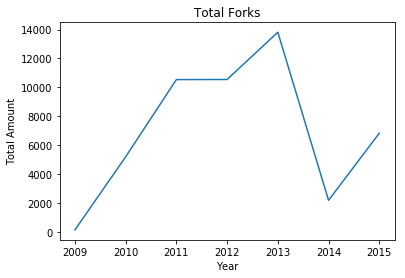

In [20]:
x = fork['forkCount']
y = fork['year']

plt.title('Total Forks')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.plot(y,x)
plt.show()

##### Mutation: 

Um eine Muttion durchführen zu können, muss die ID des Objektes welches wir manipulieren wollen bekannt sein. Um das herauszufinden müssen wir also zuerst eine Query machen um danach mit der in Erfahrung gebrachten IDeine Mutation machen zu können.

In [21]:
# Query: Suche nach der ID eines Issue-Objektes im Repository 'hello-world'
query = '''query FindIssueID {
  repository(owner:"datasienceelmo", name:"hello-world") {
    issue(number:2) {
      id
    }
  }
}'''
#Query durchführen
resultQuery = run_query(query)
pprint (resultQuery)

{'data': {'repository': {'issue': {'id': 'MDU6SXNzdWUyODYyMjQ3MzM='}}}}


In [23]:
# Mutation: Eine Reaktion dem Issue hinzufügen
mutation = '''mutation AddReactionToIssue {
  addReaction(input:{subjectId:"MDU6SXNzdWUyODYyMjQ3MzM=",content:HOORAY}) {
    reaction {
      content
    }
    subject {
      id
    }
  }
}'''

resultMutation = run_query(mutation)


print (resultMutation)

{'data': {'addReaction': {'reaction': {'content': 'HOORAY'}, 'subject': {'id': 'MDU6SXNzdWUyODYyMjQ3MzM='}}}}


Als Ergebnis ist nun links unten , beim Issue ein Party-Symbol zu sehen.

![HOORAY](images/mutation.png)

## Referenzen

[1] Butter Knife *GitHub io* [http://jakewharton.github.io/butterknife/](http://jakewharton.github.io/butterknife/) 

[2] Developer Guide API V4 *GitHub* [https://developer.github.com/v4/guides](https://developer.github.com/v4/guides)  

[3] Git *FAQ* [https://git.wiki.kernel.org/index.php/GitFaq#Why_the_.27Git.27_name.3F](https://git.wiki.kernel.org/index.php/GitFaq#Why_the_.27Git.27_name.3F)

[4] Queries und Mutationen *GraphQL* [https://graphql.org/learn/queris](https://graphql.org/learn/queris)

[5] Wikipediabeitrag *Git* [https://de.wikipedia.org/wiki/Git](https://de.wikipedia.org/wiki/Git)  

[6] Wikipediabeitrag *GitHub* [https://de.wikipedia.org/wiki/GitHub](https://de.wikipedia.org/wiki/GitHub)

[7] Wikipediabeitrag *GraphQL* [https://en.wikipedia.org/wiki/GraphQL](https://en.wikipedia.org/wiki/GraphQL)